# Decision Trees

- a set of rules for making predictions
<br>

- **leaf**: astopping point or an end point
- **node**: split data- yes or no- continue to split until a leaf
    - **root node**: the first split

#### Pros:
- easy to impliment
- easy to read
- minimal processing needed

#### Cons:
- doesn't consider feature interactions
- complex to train
- prone to 'overfitting'

### How do we construct a decision tree?
- "gini impurity" 
    - lowest G is good

## Hyperparameters
- values that you set before you create the model BEFORE the model sees your data
<br>

- **max_depth**: limit the number of splits (default:None)
- **min_sample_split**: min number of data points required to split a node (default:2) 
- **min_samples_leaf**: min nmber of dta points requried to be present in endpoint or leaf (default: 1)


# 6 Steps to the decision tree

1. imports
<br>
2. split data
<br>
3. create models
    - create
    - fit it
    - use it- .predict/.score
    
4. evauate on validate
<br>
5. interpret
    - model.feature_importances_
    - print(export_text(model))
    - plot_tree(model)
<br>    

6. evaluate on test
    - best_model.score(X_test)
    - OR pred = best_model.predict(X_test) classfication_report(test.actual, pred)

___________________________

# Exercises

In [2]:
import numpy as np
import pandas as pd
from io import StringIO

In [4]:
import acquire
import prepare

In [6]:
# Example data from the lesson
df = pd.read_csv(StringIO('''
yesterday,temp,today
no rain,80,rain
no rain,80,rain
no rain,80,no rain
rain,81,rain
rain,81,rain
rain,83,rain
rain,86,no rain
no rain,89,rain
rain,89,rain
no rain,89,no rain'''))

In [7]:
df

,yesterday,temp,today
0,no rain,80,rain
1,no rain,80,rain
2,no rain,80,no rain
3,rain,81,rain
4,rain,81,rain
5,rain,83,rain
6,rain,86,no rain
7,no rain,89,rain
8,rain,89,rain
9,no rain,89,no rain


In [12]:
#import descision tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [9]:
X, y = df[['temp']], df.today
tree = DecisionTreeClassifier()
tree.fit(X,y)

DecisionTreeClassifier()

In [10]:
tree.score(X,y)

0.8

In [21]:
#textually visualize the tree
print(export_text(tree))

|--- feature_0 <= 84.50
|   |--- feature_0 <= 80.50
|   |   |--- class: rain
|   |--- feature_0 >  80.50
|   |   |--- class: rain
|--- feature_0 >  84.50
|   |--- feature_0 <= 87.50
|   |   |--- class: no rain
|   |--- feature_0 >  87.50
|   |   |--- class: rain



In [20]:
#textually visualize the tree- add feature name to make easier to read
print(export_text(tree, feature_names= X.columns.tolist()))

|--- temp <= 84.50
|   |--- temp <= 80.50
|   |   |--- class: rain
|   |--- temp >  80.50
|   |   |--- class: rain
|--- temp >  84.50
|   |--- temp <= 87.50
|   |   |--- class: no rain
|   |--- temp >  87.50
|   |   |--- class: rain



In [17]:
#textually visualize the tree- add show weights
print(export_text(tree, feature_names= X.columns.tolist(), show_weights=True))
#show weights- gives us how many observations fall into each leaf

|--- temp <= 84.50
|   |--- temp <= 80.50
|   |   |--- weights: [1.00, 2.00] class: rain
|   |--- temp >  80.50
|   |   |--- weights: [0.00, 3.00] class: rain
|--- temp >  84.50
|   |--- temp <= 87.50
|   |   |--- weights: [1.00, 0.00] class: no rain
|   |--- temp >  87.50
|   |   |--- weights: [1.00, 2.00] class: rain



[Text(167.4, 181.2, 'X[0] <= 84.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(83.7, 108.72, 'X[0] <= 80.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(41.85, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 87.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(292.95, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]')]

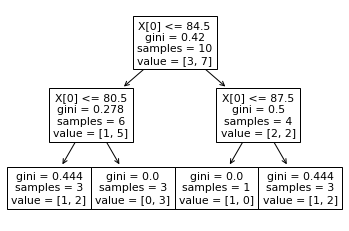

In [18]:
#visualize with matplotlib
plot_tree(tree)

[Text(167.4, 181.2, 'temp <= 84.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]\nclass = rain'),
 Text(83.7, 108.72, 'temp <= 80.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = rain'),
 Text(41.85, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = rain'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = rain'),
 Text(251.10000000000002, 108.72, 'temp <= 87.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = no rain'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no rain'),
 Text(292.95, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = rain')]

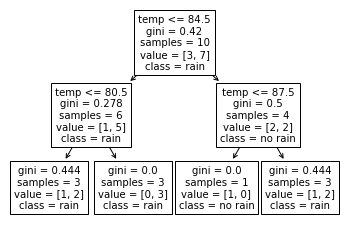

In [23]:
#visualize with matplotlib- add more features
plot_tree(tree, feature_names=X.columns.tolist(), class_names=sorted(y.unique()))

__________________________

# Exercise #2

In [5]:
train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())
train.head()

/Users/natasharivers/codeup-data-science/database-exercises/Classifications/prepare.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['age'] = imputer.transform(test[['age']])


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0


In [29]:
#only using the following columns
X_cols = ['pclass', 'alone', 'Q', 'S']

#only trying to see who survived or not
y_col = 'survived'

In [30]:
X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [48]:
#Dec Tree Classifier with NO hyper parameters
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 71.43%
validate score: 71.03%


[Text(199.5923076923077, 199.32, 'X[0] <= 2.5\ngini = 0.472\nsamples = 497\nvalue = [307, 190]'),
 Text(115.8923076923077, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.493\nsamples = 231\nvalue = [102, 129]'),
 Text(64.38461538461539, 126.83999999999999, 'X[0] <= 1.5\ngini = 0.42\nsamples = 110\nvalue = [33, 77]'),
 Text(38.63076923076923, 90.6, 'X[2] <= 0.5\ngini = 0.383\nsamples = 62\nvalue = [16, 46]'),
 Text(25.753846153846155, 54.359999999999985, 'X[3] <= 0.5\ngini = 0.375\nsamples = 60\nvalue = [15, 45]'),
 Text(12.876923076923077, 18.119999999999976, 'gini = 0.386\nsamples = 23\nvalue = [6, 17]'),
 Text(38.63076923076923, 18.119999999999976, 'gini = 0.368\nsamples = 37\nvalue = [9, 28]'),
 Text(51.50769230769231, 54.359999999999985, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(90.13846153846154, 90.6, 'X[3] <= 0.5\ngini = 0.457\nsamples = 48\nvalue = [17, 31]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(103.01538461538462

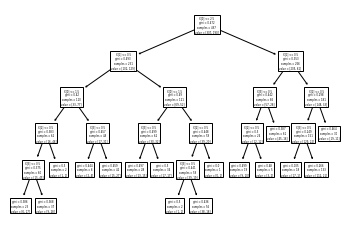

In [35]:
plot_tree(model1)

[Text(798.3692307692309, 597.96, 'pclass <= 2.5\ngini = 0.472\nsamples = 497\nvalue = [307, 190]\nclass = died'),
 Text(463.5692307692308, 489.24, 'alone <= 0.5\ngini = 0.493\nsamples = 231\nvalue = [102, 129]\nclass = survived'),
 Text(257.53846153846155, 380.52000000000004, 'pclass <= 1.5\ngini = 0.42\nsamples = 110\nvalue = [33, 77]\nclass = survived'),
 Text(154.52307692307693, 271.8, 'Q <= 0.5\ngini = 0.383\nsamples = 62\nvalue = [16, 46]\nclass = survived'),
 Text(103.01538461538462, 163.07999999999998, 'S <= 0.5\ngini = 0.375\nsamples = 60\nvalue = [15, 45]\nclass = survived'),
 Text(51.50769230769231, 54.360000000000014, 'gini = 0.386\nsamples = 23\nvalue = [6, 17]\nclass = survived'),
 Text(154.52307692307693, 54.360000000000014, 'gini = 0.368\nsamples = 37\nvalue = [9, 28]\nclass = survived'),
 Text(206.03076923076924, 163.07999999999998, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = died'),
 Text(360.55384615384617, 271.8, 'S <= 0.5\ngini = 0.457\nsamples = 48\nvalue = [

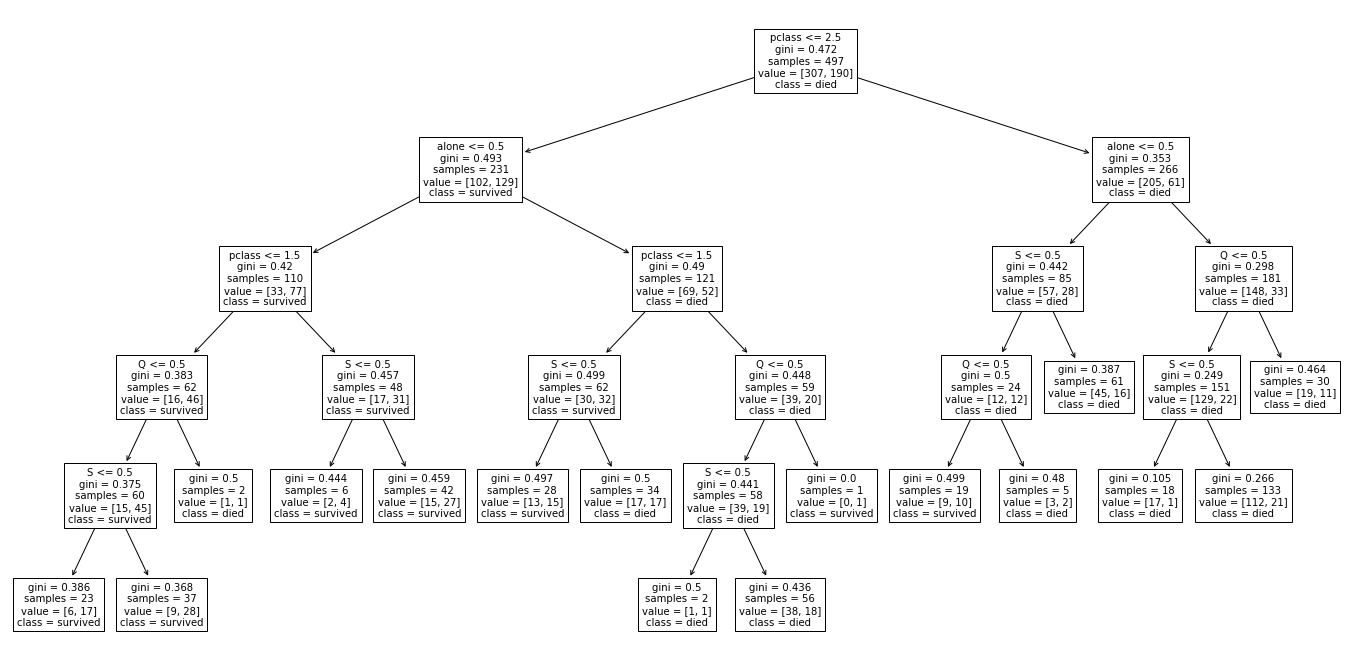

In [39]:
#redo the tree but make it larger- so its easier to read
import matplotlib.pyplot as plt
plt.figure(figsize=(24,12))

plot_tree(model1, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'])

[Text(167.4, 190.26, 'pclass <= 2.5\ngini = 0.472\nsamples = 497\nvalue = [307, 190]\nclass = died'),
 Text(83.7, 135.9, 'alone <= 0.5\ngini = 0.493\nsamples = 231\nvalue = [102, 129]\nclass = survived'),
 Text(41.85, 81.53999999999999, 'pclass <= 1.5\ngini = 0.42\nsamples = 110\nvalue = [33, 77]\nclass = survived'),
 Text(20.925, 27.180000000000007, 'gini = 0.383\nsamples = 62\nvalue = [16, 46]\nclass = survived'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.457\nsamples = 48\nvalue = [17, 31]\nclass = survived'),
 Text(125.55000000000001, 81.53999999999999, 'pclass <= 1.5\ngini = 0.49\nsamples = 121\nvalue = [69, 52]\nclass = died'),
 Text(104.625, 27.180000000000007, 'gini = 0.499\nsamples = 62\nvalue = [30, 32]\nclass = survived'),
 Text(146.475, 27.180000000000007, 'gini = 0.448\nsamples = 59\nvalue = [39, 20]\nclass = died'),
 Text(251.10000000000002, 135.9, 'alone <= 0.5\ngini = 0.353\nsamples = 266\nvalue = [205, 61]\nclass = died'),
 Text(209.25, 81.53999999999999,

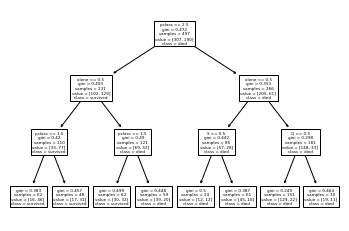

In [40]:
#still ugly- so lets add hyperparameters (max_depth=3 so.. only 3 splits)
#adding hyperparameters to avoid overfitting
model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(X_train, y_train)

plot_tree(model2, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'])

In [43]:
#make a pandas series of the x train columns for model 2 with their 'relative importance'
pd.Series(dict(zip(X_train.columns, model2.feature_importances_)))

#this shows us that pclass was the MOST important feature

pclass    0.655891
alone     0.245425
Q         0.054936
S         0.043748
dtype: float64

In [ ]:
#^^might want to create visuals of pclass vs survived
#ask yourself, if we controlled the pclass- does it change our outcomes?

<AxesSubplot:>

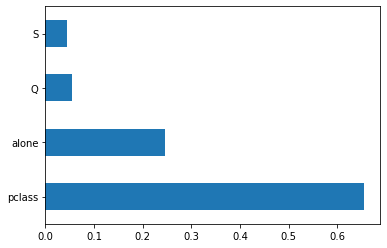

In [47]:
#visualize the pandas series
pd.Series(dict(zip(X_train.columns, model2.feature_importances_))).plot.barh()

## Recap:
### Decision Tree modeling loop

1. create the model (set hyperparameters)
2. fit the object on training data (sklearn does its math)
3. Interpret/ use the model (evaluate its performace and see how it works)
    - use: feature importance, plot tree, export text